In [1]:
!pip install pyspark

In [2]:
#!/bin/bash
!kaggle datasets download new-york-city/nyc-parking-tickets

Dataset URL: https://www.kaggle.com/datasets/new-york-city/nyc-parking-tickets
License(s): CC0-1.0
 99% 2.01G/2.02G [00:34<00:00, 63.1MB/s]
100% 2.02G/2.02G [00:34<00:00, 62.7MB/s]


In [3]:
!unzip /content/nyc-parking-tickets.zip

Archive:  /content/nyc-parking-tickets.zip
  inflating: Parking_Violations_Issued_-_Fiscal_Year_2014__August_2013___June_2014_.csv  
  inflating: Parking_Violations_Issued_-_Fiscal_Year_2015.csv  
  inflating: Parking_Violations_Issued_-_Fiscal_Year_2016.csv  
  inflating: Parking_Violations_Issued_-_Fiscal_Year_2017.csv  


In [4]:
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName("ml").getOrCreate()

In [ ]:
#spark.stop()

In [5]:
df = spark.read.csv('/content/Parking_Violations_Issued_-_Fiscal_Year_2017.csv',header=True)

df.createOrReplaceTempView("dfTable")

In [6]:
df.show(5)

+--------------+--------+------------------+----------+----------+--------------+-----------------+------------+--------------+------------+------------+------------+-----------------------+------------------+------------------+---------------+-----------+--------------+------------+--------------+-------------------+----------------+---------------------------------+------------+--------------------+-------------------+-------------------+-----------+------------+--------------------+--------------------------+--------------------+------------------+-------------+---------------------+------------+------------+--------------+-------------------+---------------------+---------------------------------+-----------------+------------------------+
|Summons Number|Plate ID|Registration State|Plate Type|Issue Date|Violation Code|Vehicle Body Type|Vehicle Make|Issuing Agency|Street Code1|Street Code2|Street Code3|Vehicle Expiration Date|Violation Location|Violation Precinct|Issuer Precinct|Is

In [ ]:
df.show(5)

+--------------+--------+------------------+----------+--------------+-----------------+------------+------------------+---------------+--------------+
|Summons Number|Plate ID|Registration State|Issue Date|Violation Code|Vehicle Body Type|Vehicle Make|Violation Precinct|Issuer Precinct|Violation Time|
+--------------+--------+------------------+----------+--------------+-----------------+------------+------------------+---------------+--------------+
|    5092469481| GZH7067|                NY|2016-07-10|             7|             SUBN|       TOYOT|                 0|              0|         0143A|
|    5092451658| GZH7067|                NY|2016-07-08|             7|             SUBN|       TOYOT|                 0|              0|         0400P|
|    4006265037| FZX9232|                NY|2016-08-23|             5|             SUBN|        FORD|                 0|              0|         0233P|
|    8478629828| 66623ME|                NY|2017-06-14|            47|             REFG|

In [ ]:
from pyspark.sql.functions import min, max

# Examine the data

In [ ]:
df=spark.sql("SELECT *  FROM dfTable")

In [ ]:
#Find the total number of tickets
print('{:,}'.format(  df.count()) )

10,803,028


## 108+ million records in the file

In [ ]:
df.show(4)

+--------------+--------+------------------+----------+--------------+-----------------+------------+------------------+---------------+--------------+
|Summons Number|Plate ID|Registration State|Issue Date|Violation Code|Vehicle Body Type|Vehicle Make|Violation Precinct|Issuer Precinct|Violation Time|
+--------------+--------+------------------+----------+--------------+-----------------+------------+------------------+---------------+--------------+
|    5092469481| GZH7067|                NY|2016-07-10|             7|             SUBN|       TOYOT|                 0|              0|         0143A|
|    5092451658| GZH7067|                NY|2016-07-08|             7|             SUBN|       TOYOT|                 0|              0|         0400P|
|    4006265037| FZX9232|                NY|2016-08-23|             5|             SUBN|        FORD|                 0|              0|         0233P|
|    8478629828| 66623ME|                NY|2017-06-14|            47|             REFG|

### Find the total number of tickets for the year.

In [ ]:
df=spark.sql("SELECT *  FROM dfTable where year(`Issue Date`)=2017")

In [ ]:
df.show(5)

+--------------+--------+------------------+----------+--------------+-----------------+------------+------------------+---------------+--------------+
|Summons Number|Plate ID|Registration State|Issue Date|Violation Code|Vehicle Body Type|Vehicle Make|Violation Precinct|Issuer Precinct|Violation Time|
+--------------+--------+------------------+----------+--------------+-----------------+------------+------------------+---------------+--------------+
|    8478629828| 66623ME|                NY|2017-06-14|            47|             REFG|       MITSU|                14|             14|         1120A|
|    5096917368| FZD8593|                NY|2017-06-13|             7|             SUBN|       ME/BE|                 0|              0|         0852P|
|    1407740258| 2513JMG|                NY|2017-01-11|            78|             DELV|       FRUEH|               106|            106|         0015A|
|    1413656420|T672371C|                NY|2017-02-04|            40|             TAXI|

In [ ]:
#Find the total number of tickets for the year.
print('{:,}'.format(  df.count()) )

5,431,918


## 54 million records for Year 2017

In [ ]:
#Find out the number of unique states from where the cars that got parking tickets came.
#(Hint: Use the column 'Registration State'.)

In [ ]:
print( "Unique States: ",df.select('Registration State').distinct().count() )

Unique States:  65


In [ ]:
#Check what are these 65 states. US has only 50 or 51 states!!! Also check the frequencies of their occurenace in our dataset
df.groupBy('Registration State').count().sort('count',ascending=False).show(65)

+------------------+-------+
|Registration State|  count|
+------------------+-------+
|                NY|4273951|
|                NJ| 475825|
|                PA| 140286|
|                CT|  70403|
|                FL|  69468|
|                IN|  45525|
|                MA|  38941|
|                VA|  34367|
|                MD|  30213|
|                NC|  27152|
|                TX|  18827|
|                IL|  18666|
|                GA|  17537|
|                99|  16055|
|                AZ|  12379|
|                OH|  12281|
|                CA|  12153|
|                ME|  10806|
|                SC|  10395|
|                MN|  10083|
|                OK|   9088|
|                TN|   8514|
|                DE|   7905|
|                MI|   7231|
|                RI|   5814|
|                NH|   4119|
|                VT|   3683|
|                AL|   3178|
|                WA|   3052|
|                OR|   2622|
|                MO|   2483|
|             

### These states do not exists in USA:  99, BC, DP, FO, GV, MB, MX, NB, NS, NT, ON, PE, PR, QB, SK, TN

In [ ]:
#As per the instuction replace 99 with Max freq states. NY is max freq. Remaining wrong state codes I am leaving alone without touching
df = df.replace(["99"],["NY"], 'Registration State')

### Number Tickets to Non-American or Wrong state code Vehicles

In [ ]:
df_temp=spark.sql("SELECT *  FROM dfTable where year(`Issue Date`)=2017 and `Registration State` in ('BC', 'DP', 'FO', 'GV', 'MB', 'MX', 'NB', 'NS', 'NT', 'ON', 'PE', 'PR', 'QB', 'SK', 'TN')")

In [ ]:
print('{:,}'.format(  df_temp.count()) )

15,680


In [ ]:
#Check where replace happend or not. And how many states after replacement
print( "Unique States: ",df.select('Registration State').distinct().count() )

df.groupBy('Registration State').count().sort('count',ascending=False).show()

Unique States:  64
+------------------+-------+
|Registration State|  count|
+------------------+-------+
|                NY|4290006|
|                NJ| 475825|
|                PA| 140286|
|                CT|  70403|
|                FL|  69468|
|                IN|  45525|
|                MA|  38941|
|                VA|  34367|
|                MD|  30213|
|                NC|  27152|
|                TX|  18827|
|                IL|  18666|
|                GA|  17537|
|                AZ|  12379|
|                OH|  12281|
|                CA|  12153|
|                ME|  10806|
|                SC|  10395|
|                MN|  10083|
|                OK|   9088|
+------------------+-------+
only showing top 20 rows



### Aprart from Local, most of the Vehicle getting tickets are from NJ, PA, FL!
### What may be the reasons? Can we know how many total vechicles come from these states to NY and then take the ratio against these numbers. If ratio is abnormal for some state then there is something serious and need to be further researched.

In [ ]:
from pyspark.sql.functions import mean,col,split, col, regexp_extract, when, lit, month

### Create a new field to identify local vs non-local vehicles

In [ ]:
df =  df.withColumn('Local',lit(1))
df =  df.withColumn("Local",when((df["Registration State"] != "NY"), 0).otherwise(1))

# Aggregation tasks

In [ ]:
#How often does each violation code occur? Display the frequency of the top five violation codes.

In [ ]:
df.printSchema()

root
 |-- Summons Number: string (nullable = true)
 |-- Plate ID: string (nullable = true)
 |-- Registration State: string (nullable = true)
 |-- Issue Date: string (nullable = true)
 |-- Violation Code: string (nullable = true)
 |-- Vehicle Body Type: string (nullable = true)
 |-- Vehicle Make: string (nullable = true)
 |-- Violation Precinct: string (nullable = true)
 |-- Issuer Precinct: string (nullable = true)
 |-- Violation Time: string (nullable = true)
 |-- Local: integer (nullable = false)



### Identify Null Values in Any Field of the dataset

In [ ]:
def null_value_count(df):
    null_columns_counts = []
    numRows = df.count()
    for k in df.columns:
        #df.where(df[k].isNull()).count()
        nullRows = df.where(df[k]=="nan").count()
        temp = k,nullRows
        null_columns_counts.append(temp)
    return(null_columns_counts)

null_columns_count_list = null_value_count(df)

print("Null Value Columns")
null_columns_count_list

Null Value Columns


[('Summons Number', 0),
 ('Plate ID', 252),
 ('Registration State', 0),
 ('Issue Date', 0),
 ('Violation Code', 0),
 ('Vehicle Body Type', 20201),
 ('Vehicle Make', 38509),
 ('Violation Precinct', 0),
 ('Issuer Precinct', 0),
 ('Violation Time', 16),
 ('Local', 0)]

In [ ]:
#Drop complete record if any of the value is null in any of the column
df= df.where( df["Plate ID"]!="nan")
df= df.where( df["Vehicle Body Type"]!="nan")
df= df.where( df["Vehicle Make"]!="nan")
df= df.where( df["Violation Time"]!="nan")


In [ ]:
#Rechck Null Values
null_columns_count_list = null_value_count(df)

print("Null Value Columns")
null_columns_count_list

Null Value Columns


[('Summons Number', 0),
 ('Plate ID', 0),
 ('Registration State', 0),
 ('Issue Date', 0),
 ('Violation Code', 0),
 ('Vehicle Body Type', 0),
 ('Vehicle Make', 0),
 ('Violation Precinct', 0),
 ('Issuer Precinct', 0),
 ('Violation Time', 0),
 ('Local', 0)]

### Check How Many Unique Variables in each Categorical Field

In [ ]:
print("Unique Vehicles          : {:,}".format(  df.select('Plate ID').distinct().count())   )
print("Unique Violation Code    : {:,}".format(  df.select('Violation Code').distinct().count())   )
print("Unique Vehicle Body Type : {:,}".format(  df.select('Vehicle Body Type').distinct().count())   )
print("Unique Vehicle Make      : {:,}".format(  df.select('Vehicle Make').distinct().count())   )
print("Unique Violation Precinct: {:,}".format(  df.select('Violation Precinct').distinct().count())   )
print("Unique Issuer Precinct   : {:,}".format(  df.select('Issuer Precinct').distinct().count())   )

Unique Vehicles          : 1,963,358
Unique Violation Code    : 100
Unique Vehicle Body Type : 1,082
Unique Vehicle Make      : 3,073
Unique Violation Precinct: 167
Unique Issuer Precinct   : 497


### Check any duplicate summon number

In [ ]:
print("Unique Summons Number   : {:,}".format(  df.select('Summons Number').distinct().count())   )
print("Number of Records       : {:,}".format(  df.select('Summons Number').count())   )

Unique Summons Number   : 5,378,917
Number of Records       : 5,378,917


#### No duplicate Summon Number. So, this field can be considered primary key.

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

### Vehicle Analysis

In [ ]:
def bar_plot(df, X, title=""):
    plt.figure(figsize=(20,5))
    ax1=sns.barplot(x=X, y='count', data=df)

    plt.title(title)
    plt.ylabel("Count")
    plt.xlabel(X)

    sns.set_style("white")

    # Rotate the labels on x-axis
    for item in ax1.get_xticklabels():
        item.set_rotation(90)

    plt.show()

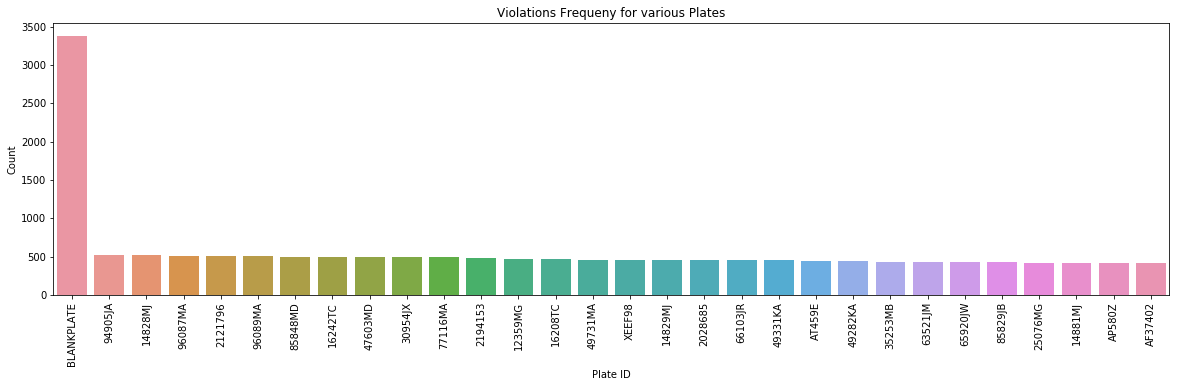

In [ ]:
df2=df.select('Plate ID').groupBy('Plate ID').count().sort('count',ascending=False)
df_plate =df2.toPandas()
bar_plot(df_plate[:30],"Plate ID","Violations Frequeny for various Plates")

In [ ]:
#3378 Records with Blankplate. i.e. BlankPlate taxi got ticket 3378 times.
df.where( df["Plate ID"]=="BLANKPLATE").count()

3378

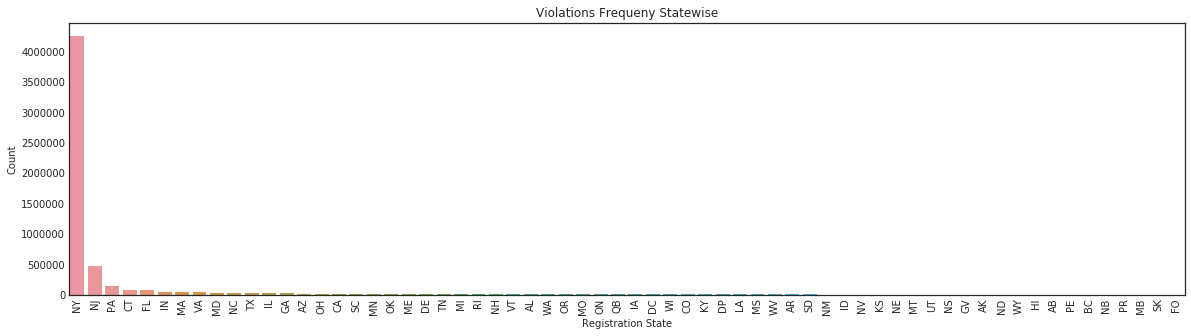

In [ ]:
df2=df.select('Registration State').groupBy('Registration State').count().sort('count',ascending=False)
df_state =df2.toPandas()
bar_plot(df_state,"Registration State","Violations Frequeny Statewise")

In [ ]:
df_state[:30]

,Registration State,count
0,NY,4256573
1,NJ,470390
2,PA,138323
3,CT,69624
4,FL,68626
5,IN,44860
6,MA,38253
7,VA,33961
8,MD,29956
9,NC,26820


In [ ]:
from pyspark.sql.functions import date_trunc
from pyspark.sql.functions import dayofmonth, month, dayofweek

## Monthly Ticket Issue
### Almost no data is available from Jul to Dec Period. From the availalbe data most Tickets were issued in May followed by Mar. It looks there is some problem in data

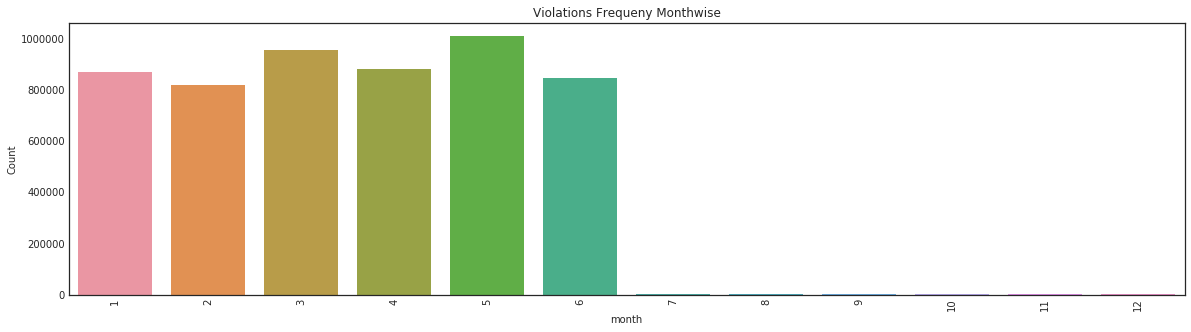

In [ ]:
df_month = df.select(month(df["Issue Date"]).alias('month')).groupBy('month').count().sort('count',ascending=False).toPandas()
bar_plot(df_month,"month","Violations Frequeny Monthwise")

In [ ]:
df_month[:4]

,month,count
0,5,1009673
1,3,954993
2,4,878829
3,1,868734


## Day of Week Ticket Issue
### On Monday there are least # of tickets issued followed by Sat. Friday and Wed are most ticket issued.

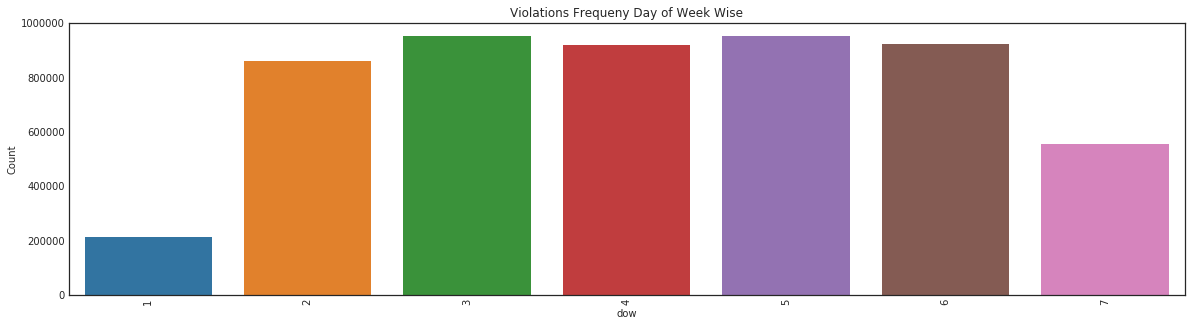

In [ ]:
df_dow   = df.select(dayofweek(df["Issue Date"]).alias('dow')).groupBy('dow').count().sort('count',ascending=False).toPandas()
bar_plot(df_dow,"dow", "Violations Frequeny Day of Week Wise")

In [ ]:
df_dow[:7]

,dow,count
0,5,953004
1,3,951629
2,6,924332
3,4,919010
4,2,860602
5,7,555417
6,1,214923


### Is there any trend of Local (New Yorker) vs Non-Local on Any Weekday
#### Most of Tickets are for Local people. No significant difference on any day.

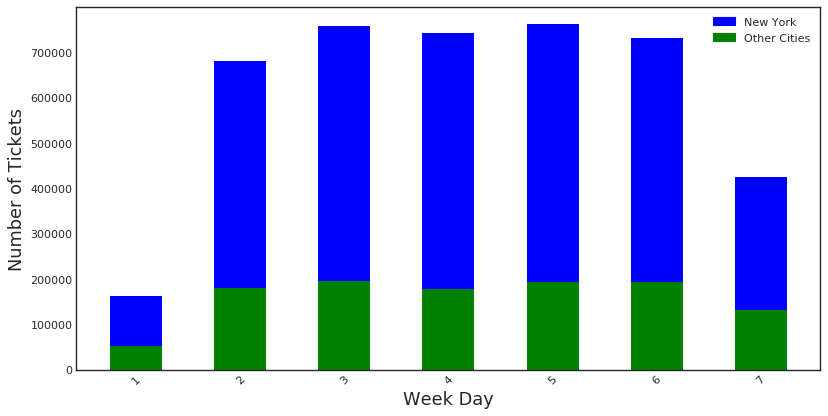

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

df_dow   = df.select(dayofweek(df["Issue Date"]).alias('dow'), df["Local"]).groupBy('dow',"Local").count().sort('count',ascending=False).toPandas()

df_dow_local= df_dow[ df_dow.Local==1]
df_dow_nlocal=df_dow[ df_dow.Local==0]

plt.figure(num=None, figsize=(12, 6), dpi=80, facecolor='w', edgecolor='k') #size of the plot

#labels=#['Mon','Tue','Wed','Thu','Fri','Sat','Sun']
plt.bar(df_dow_local['dow'] , df_dow_local['count'], color = 'b', width = 0.5) # plotting the graph
plt.bar(df_dow_nlocal['dow'], df_dow_nlocal['count'], color = 'g', width = 0.5)
plt.xticks(df_dow_local['dow'],  rotation=45) #providing xticks to the graph

blue_patch=mpatches.Patch(color='b',label='New York')
green_patch=mpatches.Patch(color='g',label='Other Cities')
plt.legend(handles=[blue_patch,green_patch]) #providing the labels
plt.xlabel('Week Day',fontsize=16)
plt.ylabel('Number of Tickets',fontsize=16)
plt.show()

## Day of Month
#### Most number of tickets are issued on 3 of every month, followed by 27, 20 & 6

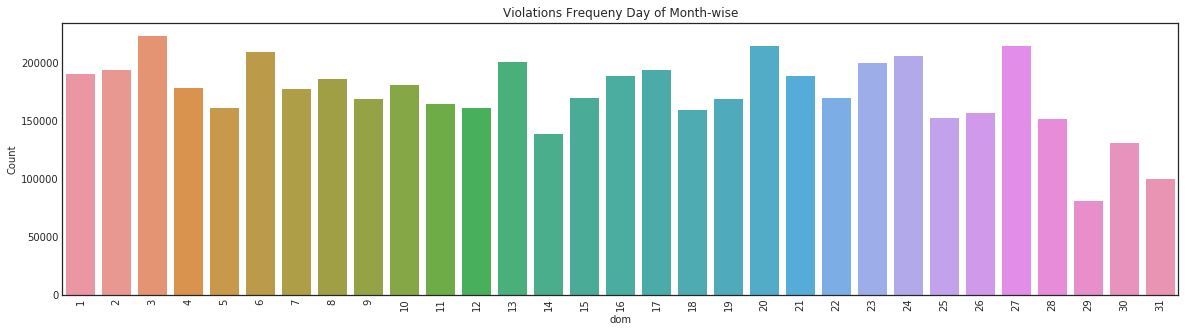

In [ ]:
df_dom   = df.select(dayofmonth(df["Issue Date"]).alias('dom')).groupBy('dom').count().sort('count',ascending=False).toPandas()
bar_plot(df_dom,"dom","Violations Frequeny Day of Month-wise")

In [ ]:
df_dom[:4]

,dom,count
0,3,223350
1,27,214675
2,20,214494
3,6,209473


### 1  How often does each violation code occur? Display the frequency of the top five violation codes.
#### Most of the violoation happend for code 21, followed by 36.

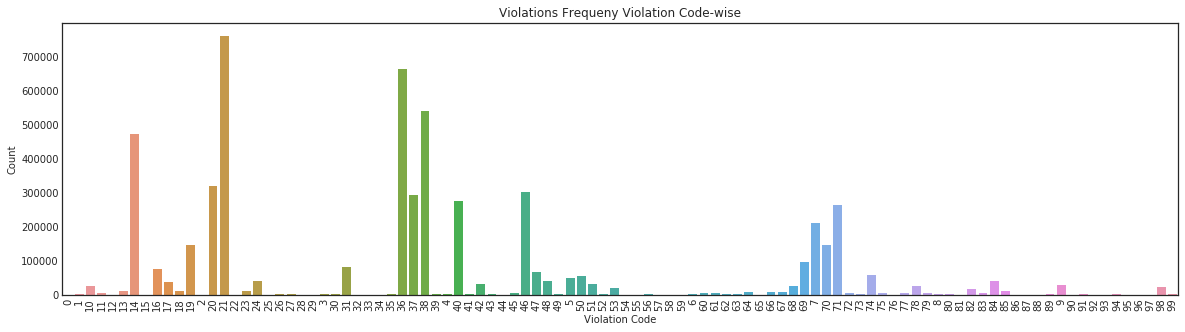

In [ ]:
df2=df.select('Violation Code').groupBy('Violation Code').count().sort('count',ascending=False)
df_violation =df2.toPandas()
bar_plot(df_violation,"Violation Code", "Violations Frequeny Violation Code-wise")

In [ ]:
print(len(df_violation))
df_violation[:5]

100


,Violation Code,count
0,21,759775
1,36,661827
2,38,540128
3,14,472242
4,20,317639


In [ ]:
#df_violation.to_csv("violation.csv")

### 2 How often does each 'vehicle body type' get a parking ticket?  (Hint: Find the top 5 for both.)
### Most of the vechicle getting tickets have SUBN body type, followed by 4 DSD type

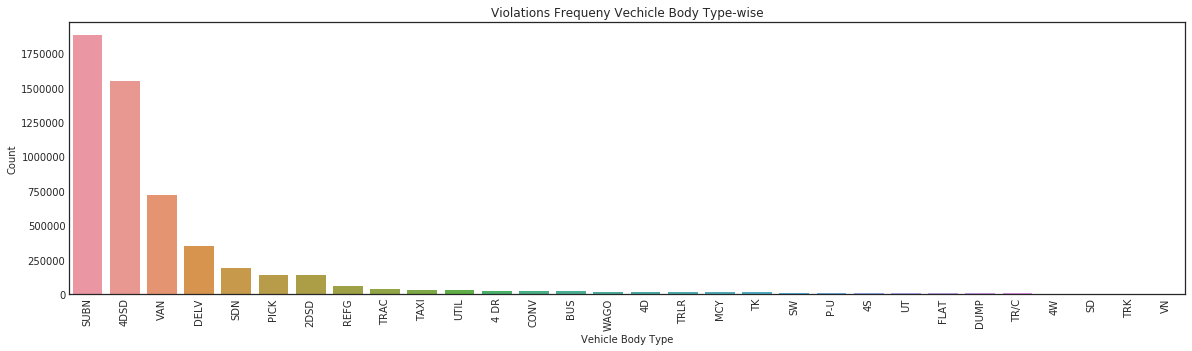

In [ ]:
df2=df.select('Vehicle Body Type').groupBy('Vehicle Body Type').count().sort('count',ascending=False)
df_vb =df2.toPandas()
bar_plot(df_vb[:30],"Vehicle Body Type","Violations Frequeny Vechicle Body Type-wise")

In [ ]:
print( len(df_vb))
df_vb[:5]

1082


,Vehicle Body Type,count
0,SUBN,1880731
1,4DSD,1546935
2,VAN,718880
3,DELV,351872
4,SDN,190318


### 2 How often does each 'vehicle make' get a parking ticket?  (Hint: Find the top 5)
### Ford Vechicle get ticket most frequently followed by Toyota and Honda! Is it because most of the Vehicle driving in the City of Ford? Or there is something wrong with Ford Vehicle? Or something wrong with Ford Drivers and their attitude?

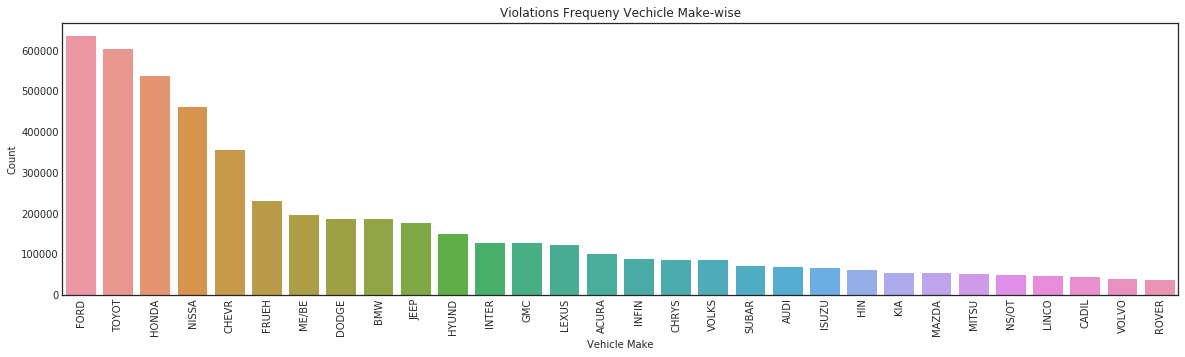

In [ ]:
df2=df.select('Vehicle Make').groupBy('Vehicle Make').count().sort('count',ascending=False)
df_vm =df2.toPandas()
bar_plot(df_vm[:30],"Vehicle Make", "Violations Frequeny Vechicle Make-wise")

In [ ]:
print (len(df_vm))
df_vm[:5]

3073


,Vehicle Make,count
0,FORD,635353
1,TOYOT,604078
2,HONDA,537604
3,NISSA,460923
4,CHEVR,355270


### 3. A precinct is a police station that has a certain zone of the city under its command. Find the (5 highest) frequencies of tickets for each of the following:

### 3.1 'Violation Precinct' (This is the precinct of the zone where the violation occurred). Using this, can you draw any insights for parking violations in any specific areas of the city?

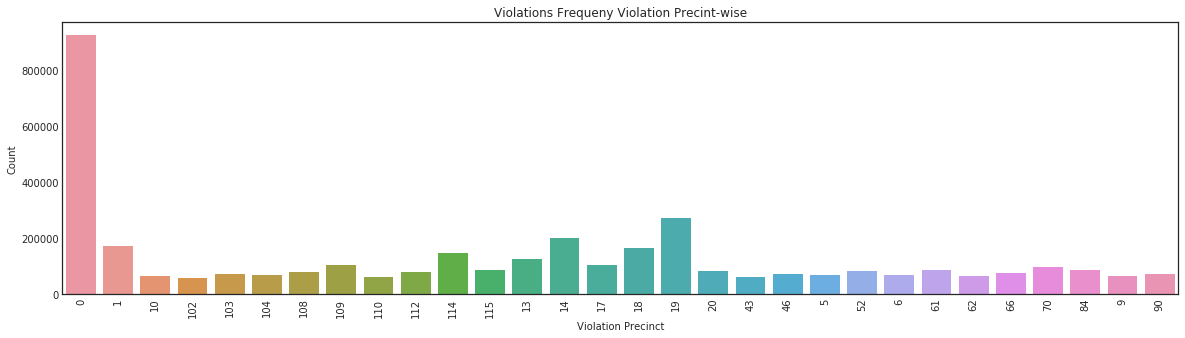

In [ ]:
df2=df.select('Violation Precinct').groupBy('Violation Precinct').count().sort('count',ascending=False)
df_vp =df2.toPandas()
bar_plot(df_vp[:30],"Violation Precinct", "Violations Frequeny Violation Precint-wise")

#### Here, you would have noticed that the dataframe has the 'Violating Precinct' or 'Issuing Precinct' as '0'. These are erroneous entries. Hence, you need to provide the records for five correct precincts. (Hint: Print the top six entries after sorting.)

In [ ]:
print(len(df_vp))
df_vp.loc[:6]

167


,Violation Precinct,count
0,0,923350
1,19,272134
2,14,200657
3,1,172094
4,18,165992
5,114,146764
6,13,124086


#### It looks there is serious parking problem or too much congetion in Area 19, 14, 1, 18, 114, 13. It may be possible that people donot care for law and rich enough to pay fine :)

In [ ]:
print(df_vp['count'].sum())
(100*df_vp['count'].cumsum()/df_vp['count'].sum()).loc[:30]

5378917


0     17.166095
1     22.225366
2     25.955801
3     29.155218
4     32.241193
5     34.969697
6     37.276593
7     39.195437
8     41.097437
9     42.877033
10    44.498028
11    46.105842
12    47.677888
13    49.191984
14    50.695874
15    52.183125
16    53.659928
17    55.064765
18    56.426080
19    57.758207
20    59.075479
21    60.327553
22    61.575536
23    62.822981
24    64.054716
25    65.278828
26    66.476207
27    67.635548
28    68.744712
29    69.817233
30    70.887132
Name: count, dtype: float64

#### Most of violations are happening in zone 19.
#### 52% of violotation are happening in 29 areas (i.e. 16% of areas are source 52% of violation)

### 3.2 'Issuer Precinct' (This is the precinct that issued the ticket.)

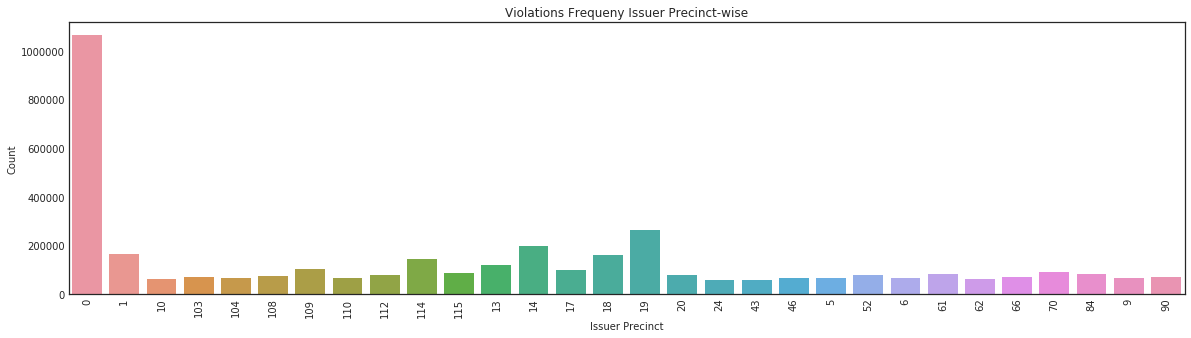

In [ ]:
df2=df.select('Issuer Precinct').groupBy('Issuer Precinct').count().sort('count',ascending=False)
df_ip =df2.toPandas()
bar_plot(df_ip[:30],"Issuer Precinct","Violations Frequeny Issuer Precinct-wise")

#### Here, you would have noticed that the dataframe has the 'Violating Precinct' or 'Issuing Precinct' as '0'. These are erroneous entries. Hence, you need to provide the records for five correct precincts. (Hint: Print the top six entries after sorting.)

In [ ]:
print(len(df_ip))
df_ip[0:6]

497


,Issuer Precinct,count
0,0,1063307
1,19,264944
2,14,198002
3,1,166825
4,18,160341
5,114,143511


In [ ]:
print(df_ip['count'].sum())
(100*df_ip['count'].cumsum()/df_ip['count'].sum()).loc[:30]

5378917


0     19.768050
1     24.693651
2     28.374727
3     31.476187
4     34.457104
5     37.125131
6     39.387724
7     41.328654
8     43.187262
9     44.891546
10    46.472106
11    48.010557
12    49.514744
13    51.003222
14    52.471827
15    53.905442
16    55.325542
17    56.659807
18    57.942352
19    59.217943
20    60.471020
21    61.699223
22    62.927221
23    64.144697
24    65.360183
25    66.562470
26    67.731106
27    68.863267
28    69.922217
29    70.968022
30    72.010797
Name: count, dtype: float64

#### Most of Tickets are issued by zone 19 (this is error code)
#### 52% of violotation are happening in 29 areas (i.e. 5.7% of issuer prcinct are source 52% of violation) [Here I have ignored error code 0]

### 4 Find the violation code frequencies for three precincts that have issued the most number of tickets. Do these precinct zones have an exceptionally high frequency of certain violation codes? Are these codes common across precincts?

In [ ]:
#Top 3 Precincts where violations are most
df_ip[:4]

,Issuer Precinct,count
0,0,1063307
1,19,264944
2,14,198002
3,1,166825


### Top 3 Pricinct which issued higest numbers of the tickets are 19, 14, 1

In [ ]:
df2=spark.sql("select `Issuer Precinct`, `Violation Code` from dfTable where `Issuer Precinct` in (19,14,1)")

df_issuer_violation=(df2.select("Issuer Precinct", "Violation Code").groupBy("Issuer Precinct","Violation Code")\
                                .count().sort('count', ascending=False)).toPandas()



#### In Pricinct 19 Most Violoation is against Violation Code 46

In [ ]:
#46 => 	Standing or parking on the roadway side of a vehicle stopped, standing or parked at the curb; in other words
# also known as "double parking". However, a person may stand a Commercial Vehicle alongside a vehicle parked at the
# curb at such locations and during such hours that stopping, standing and parking is allowed when quickly making pickups,
# deliveries or service calls. This is allowed if there is no parking space or marked loading zone on either
# side of the street within 100 feet. "Double parking" any type of vehicle is not allowed in Midtown Manhattan
# (the area from 14th Street to 60th Street, between First Avenue and Eighth Avenue inclusive). Midtown double
# parking is not allowed between 7:00am – 7:00pm daily except Sundays. (Read Code 47)

df_issuer_violation.loc[df_issuer_violation['Issuer Precinct']=='19'].head(3)

,Issuer Precinct,Violation Code,count
0,19,46,86390
3,19,37,72437
4,19,38,72344


#### In Princinct 14 Most Violation is against Violation Code 14

In [ ]:
#14=> (Standing or parking where standing is not allowed by sign, street marking or; traffic control device.)
df_issuer_violation.loc[df_issuer_violation['Issuer Precinct']=='14'].head(3)

,Issuer Precinct,Violation Code,count
1,14,14,73837
5,14,69,58026
8,14,31,39857


#### In Princinct 14 also Most Violation is against Violation Code 14

In [ ]:
#In Princinct 1 Most Violoation is against Violation Code 14
df_issuer_violation.loc[df_issuer_violation['Issuer Precinct']=='1'].head(3)

,Issuer Precinct,Violation Code,count
2,1,14,73522
9,1,16,38937
12,1,20,27841


### 5 Find out the properties of parking violations across different times of the day

#### 5.1 Find a way to deal with missing values, if any.
##### (Hint: Check for the null values using 'isNull' under the SQL. Also, to remove the null values, check the 'drop na' command in the API documentation.)

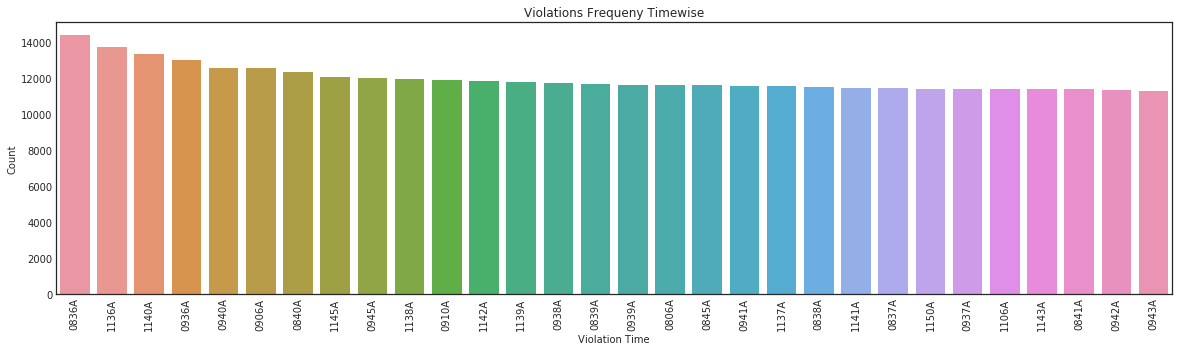

In [ ]:
df2=df.select('Violation Time').groupBy('Violation Time').count().sort('count',ascending=False)
df_vt =df2.toPandas()

bar_plot(df_vt[:30],"Violation Time","Violations Frequeny Timewise")

In [ ]:
# This time is cryptic and does not make any sense at first glance

In [ ]:
#remove those time records which has <= 10 counts. Those are wrong time entries
df_vt = df_vt[ df_vt['count']>10 ]

#### 5.2 The Violation Time field is specified in a strange format. Find a way to make this a time attribute that you can use to divide into groups.

In [ ]:
# Gives time in 24 hours format
def getDate(x):

    if x[-1::]=="A" and int(x[:4:])>=1200 and int(x[:4:])<=1259 : #Mid night 1200 and ownards to till 12:59 remove hours.
        return "00:" + x[2:4]

    if x[-1::]=="P" and int(x[:4:])>=0 and int(x[:4:])<=59 : #if 12PM and onwards till 1259 pm first 2 digits 12 not 00
        return "12:" + x[2:4]

    if x[-1::]=="P" and int(x[:4:])>=100 and int(x[:4:])<=1159 : #if 1PM and onwards till 1159 pm add 12 hours
        return str(int(x[:2:])+12) + ":" + x[2:4]
    else:
        return x[:2] +":"+x[2:4]


In [ ]:
df_vt['Time'] = df_vt['Violation Time'].apply(getDate)
df_vt['Hours'] = df_vt['Time'].str[:2].astype(int)


In [ ]:
df_vt.head()

,Violation Time,count,Time,Hours
0,0836A,14397,08:36,8
1,1136A,13717,11:36,11
2,1140A,13348,11:40,11
3,0936A,13025,09:36,9
4,0940A,12565,09:40,9


In [ ]:
df_vt1 = df_vt.groupby("Hours").sum().reset_index()

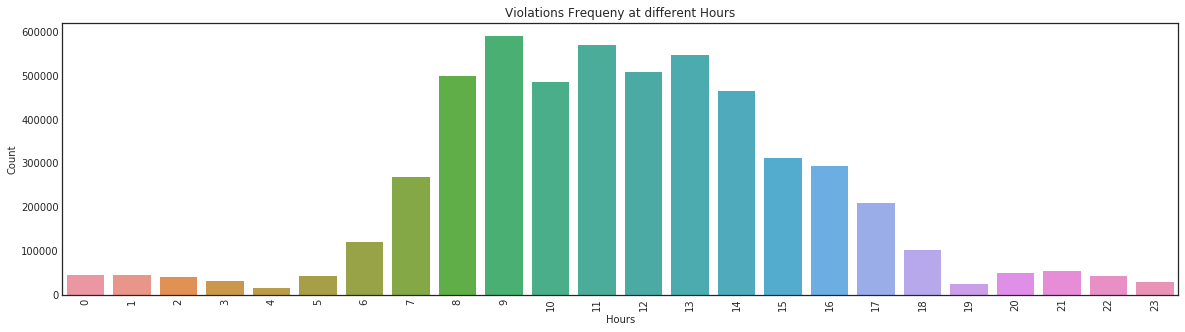

In [ ]:
bar_plot(df_vt1,"Hours","Violations Frequeny at different Hours")

#### 5.3 Divide 24 hours into six equal discrete bins of time. Choose the intervals as you see fit. For each of these groups, find the three most commonly occurring violations.
##### (Hint: Use the CASE-WHEN in SQL view to segregate into bins. To find the most commonly occurring violations, you can use an approach similar to the one mentioned in the hint for question 4.)

In [ ]:
#Equal interval of 4 hours doesn't make sense. Hence I created following bins
#Mid night 12 to 5am => 1
#5 am onwards to 7am => 2
#7 am onwards to 1pm => 3
#1 pm onwards to 4pm => 4
#4 pm to 6 pm        => 5
#6 pm to midnight    => 6

In [ ]:
from pyspark.ml.feature import Bucketizer
bucketBorders = [-1,5,7,13,16,18,23]
bucketer = Bucketizer().setSplits(bucketBorders).setInputCol("Hours").setOutputCol('Bucket')
bucketer.transform(  spark.createDataFrame(df_vt1 )   ).show()


#import pandas as pd
#df_vt1['TimeBin'] = pd.cut(df_vt1.Hours,[-1,5,7,13,16,18,23],labels=[1,2,3,4,5,6])
#df_vt1

+-----+------+------+
|Hours| count|Bucket|
+-----+------+------+
|    0| 44210|   0.0|
|    1| 44342|   0.0|
|    2| 39057|   0.0|
|    3| 31494|   0.0|
|    4| 13951|   0.0|
|    5| 42640|   1.0|
|    6|120766|   1.0|
|    7|267608|   2.0|
|    8|499111|   2.0|
|    9|590339|   2.0|
|   10|484462|   2.0|
|   11|569564|   2.0|
|   12|506574|   2.0|
|   13|546400|   3.0|
|   14|463413|   3.0|
|   15|312335|   3.0|
|   16|292873|   4.0|
|   17|208649|   4.0|
|   18|102682|   5.0|
|   19| 25193|   5.0|
+-----+------+------+
only showing top 20 rows



### 6.a  First, divide the year into a certain number of seasons (Hint: Use Issue Date to segregate into seasons.)

In [ ]:
#Spring begins with the Vernal Equinox, Thursday, March 19, 2017, 11:50 p.m.
#Summer begins with the Summer Solstice, Saturday, June 20, 2017, 5:44 p.m.
#Autumn begins with the Autumnal Equinox, Tuesday, September 22, 2017, 9:31 a.m.
#Winter begins with the Winter Solstice, Monday, December 21, 2018, 5:02 a.m.

#To keep it simple
#Winter (1) =1,2,3
#Spring (2) =4,5,6
#Summer (3) =7,8,9
#Autumn (4) =9,10,11

In [ ]:
#Create a new fieled Month
df2 = df.withColumn('Month', month(df["Issue Date"]))
#Create a new field Season
df2 = df2.withColumn('Season',lit(1))
df2 = df2.withColumn("Season",when((df2["Month"] >= 1) & (df2["Month"]<=3),  1).otherwise(df2["Season"]))
df2 = df2.withColumn("Season",when((df2["Month"] >= 4) & (df2["Month"]<=6),  2).otherwise(df2["Season"]))
df2 = df2.withColumn("Season",when((df2["Month"] >= 7) & (df2["Month"]<=9),  3).otherwise(df2["Season"]))
df2 = df2.withColumn("Season",when((df2["Month"] >=10) & (df2["Month"]<=12), 4).otherwise(df2["Season"]))

In [ ]:
df_season= (df2.select('Season').groupBy('Season').count().sort('count',ascending=False)).toPandas()
df_season

,Season,count
0,2,2734745
1,1,2642335
2,3,955
3,4,882


In [ ]:
df_season_violation= (df2.select('Season','Violation Code').groupBy('Season','Violation Code').count().sort('count',ascending=False)).toPandas()
df_season_violation

,Season,Violation Code,count
0,2,21,389958
1,1,21,369509
2,1,36,347755
3,2,36,314072
4,1,38,286188
5,2,38,253926
6,2,14,248934
7,1,14,223147
8,2,20,169509
9,2,46,152784


### 6.b  Find the three most common violations for each of these seasons.

## There are different kind of violations in different seasons

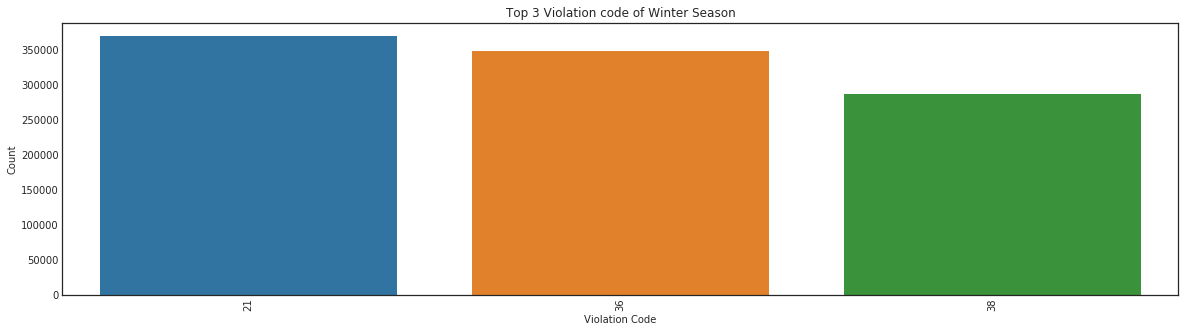

In [ ]:
df_temp = df_season_violation[ df_season_violation.Season==1].sort_values(["Season","count"],ascending=False)[:3]
bar_plot(df_temp,"Violation Code","Top 3 Violation code of Winter Season")

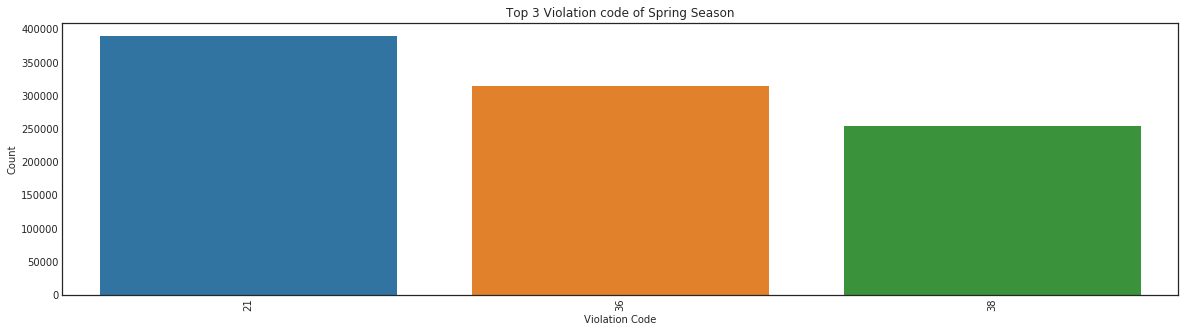

In [ ]:
df_temp = df_season_violation[ df_season_violation.Season==2].sort_values(["Season","count"],ascending=False).head(3)
bar_plot(df_temp,"Violation Code","Top 3 Violation code of Spring Season")

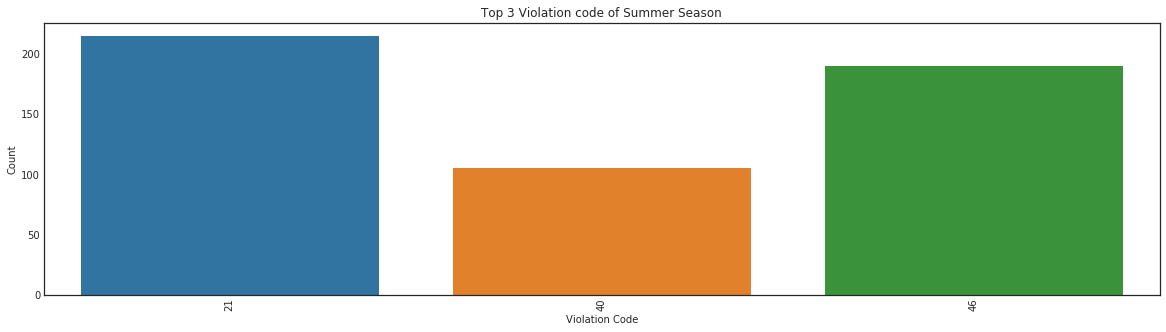

In [ ]:
df_temp=df_season_violation[ df_season_violation.Season==3].sort_values(["Season","count"],ascending=False).head(3)
bar_plot(df_temp,"Violation Code","Top 3 Violation code of Summer Season")

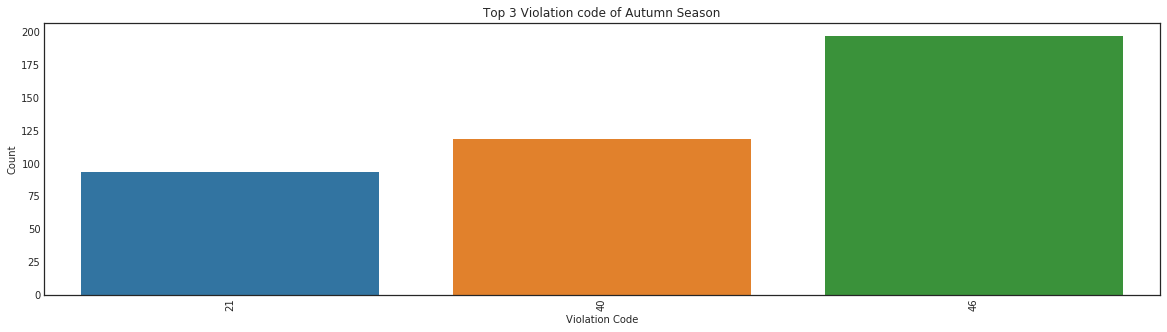

In [ ]:
df_temp=df_season_violation[ df_season_violation.Season==4].sort_values(["Season","count"],ascending=False).head(3)
bar_plot(df_temp,"Violation Code","Top 3 Violation code of Autumn Season")

### 7 The fines collected from all the instances of parking violation constitute a source of revenue for the NYC Police Department. Let’s take an example of estimating this for the three most commonly occurring codes:

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
#Top Three violation code
df_fine =df_violation[:3]
df_fine

,Violation Code,count
0,21,759775
1,36,661827
2,38,540128


In [ ]:
#Average Fine for these codes is (from the given link)
#21 => $55
#36 => $50
#38 => $50

In [ ]:
df_fine.loc[:,'Fine_Rate'] = [55,50,50]
df_fine["Total_Fine"] = df_fine["count"] * df_fine["Fine_Rate"]

In [ ]:
df_fine

,Violation Code,count,Fine_Rate,Total_Fine
0,21,759775,55,41787625
1,36,661827,50,33091350
2,38,540128,50,27006400


In [ ]:
print("Total Fine Collected from top 3 violations")
print('{:,}'.format(  df_fine.Total_Fine.sum() ) )

Total Fine Collected from top 3 violations
101,885,375


In [ ]:
df_fine['count'].sum() / df_violation['count'].sum()

0.364707244971432

#### Top 3 fine code applied to 36% (almost 1/3) of the tickets